In [3]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


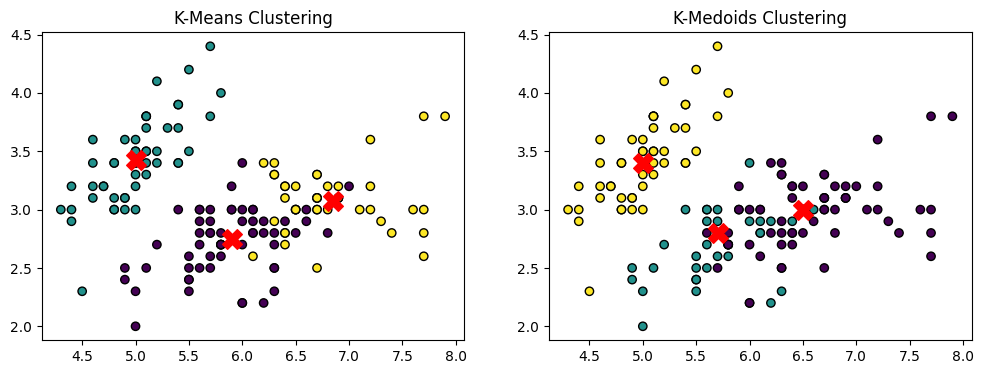

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X)
kmedoids_labels = kmedoids.labels_

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
axes[0].set_title('K-Means Clustering')

axes[1].scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis', edgecolor='k')
axes[1].scatter(X[kmedoids.medoid_indices_, 0], X[kmedoids.medoid_indices_, 1], marker='X', s=200, c='red')
axes[1].set_title('K-Medoids Clustering')

plt.show()


In [11]:
pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=93c7b91ac62c14f281721fe04526b1a645d0f249979a619c1c14bcf2850c0056
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Accuracy: 0.31333333333333335
Cluster Centers:
[[6.77435321 3.05219056 5.64596133 2.05322965]
 [5.88838785 2.76087309 4.36315618 1.39690512]
 [5.00396468 3.41411578 1.48277167 0.25352664]]


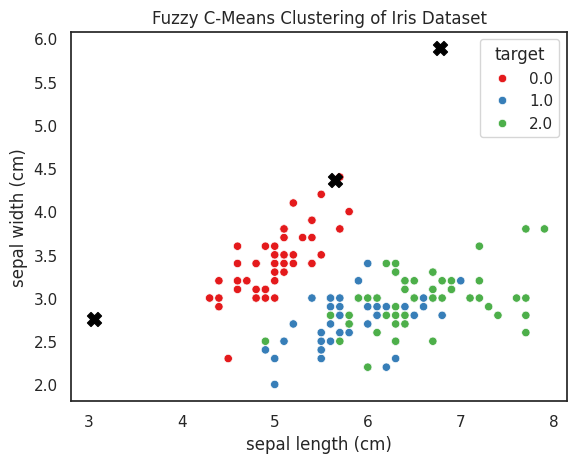

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
import skfuzzy as fuzz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# Load Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Drop the target column and encode it separately for evaluation
data_input = data.drop('target', axis=1)
target = data['target']

# Encode target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Set up the FCM model
n_clusters = 3
fcm = fuzz.cluster.cmeans(data_input.T.values, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# Get cluster memberships
cluster_membership = np.argmax(fcm[1], axis=0)

# Decode the target variable for evaluation
cluster_membership_decoded = label_encoder.inverse_transform(cluster_membership)

# Calculate accuracy
accuracy = accuracy_score(target, cluster_membership_decoded)
print(f"Accuracy: {accuracy}")

# Display the cluster centers
print("Cluster Centers:")
print(fcm[0])

sns.set(style="white")
fig, ax = plt.subplots()

# Scatter plot for the original data
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=target, data=data, palette='Set1', ax=ax, legend='full')

# Mark cluster centers
for i in range(n_clusters):
    plt.scatter(fcm[0][0, i], fcm[0][1, i], marker='X', color='black', s=100)

plt.title('Fuzzy C-Means Clustering of Iris Dataset')
plt.show()
